In [2]:
!pip install netCDF4

  Using cached netCDF4-1.5.5.1-cp36-cp36m-manylinux2014_x86_64.whl (4.7 MB)
  Using cached cftime-1.3.1-cp36-cp36m-manylinux2014_x86_64.whl (325 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install xarray

  Using cached xarray-0.16.2-py3-none-any.whl (736 kB)
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [4]:
import netCDF4

In [5]:
f = netCDF4.Dataset('super_resolution_sample.nc', 'r')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: train


In [6]:
INPUT_FILE = 'super_resolution_sample.nc'

In [7]:
import xarray as xa
sample_x = xa.open_dataset(INPUT_FILE, group='/train/x')

In [8]:
test_x = xa.open_dataset(INPUT_FILE, group='/train/y')

In [5]:
df = sample_x.to_dataframe()

In [9]:
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [14]:
df = sample_x.to_dataframe()
dff = test_x.to_dataframe()

In [17]:
df

mg_delta    me_delta  zp_delta      vg_delta  \
time                x   y                                                       
2016-10-01 00:00:00 0   0    5.995204e-14  -73.769531  1.595800 -3.000000e+00   
                        1    5.995204e-14  -22.457031  1.529394  2.398082e-12   
                        2    5.995204e-14    1.855469  1.509130  2.398082e-12   
                        3    5.995204e-14  -71.894531  1.880713  2.398082e-12   
                        4    5.995204e-14 -104.457031  1.938818  2.398082e-12   
...                                   ...         ...       ...           ...   
2016-10-03 09:00:00 255 251 -1.940308e-01   15.730469 -3.083399  2.398082e-12   
                        252 -1.106873e-01   22.105469 -2.199854  2.398082e-12   
                        253 -1.940308e-01   21.230469 -3.067530  2.398082e-12   
                        254 -1.940308e-01   10.980469 -3.167627  2.398082e-12   
                        255 -2.453613e-02   -4.957031  0.117285  2.398082e-12   

                                   td   train_tt           pn        nt  \
time                x   y                                                 
2016-10-01 00:00:00 0   0    1.877701  10.292023  1009.307739  0.105957   
                        1    1.877701  10.292023  1009.307739  0.105957   
                        2    1.877701  10.292023  1009.307739  0.105957   
                        3   -0.153549  12.098663  1009.385864  0.371582   
                        4   -0.153549  12.098663  1009.385864  0.371582   
...                               ...        ...          ...       ...   
2016-10-03 09:00:00 255 251  2.094345   3.891663  1014.628174  0.576660   
                        252  2.094345   3.891663  1014.628174  0.576660   
                        253  2.094345   3.891663  1014.628174  0.576660   
                        254  2.094345   3.891663  1014.628174  0.576660   
                        255  2.594345   3.926819  1014.690674  0.980957   

                                       h            rt   i4   5p        i6  \
time                x   y                                                    
2016-10-01 00:00:00 0   0    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        1    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        2    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        3    1500.394775  0.000000e+00  0.0  0.0  0.800054   
                        4    1500.394775  0.000000e+00  0.0  0.0  0.800054   
...                                  ...           ...  ...  ...       ...   
2016-10-03 09:00:00 255 251    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        252    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        253    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        254    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        255    82.975586  3.725290e-08  0.0  0.0  0.800054   

                                   uu        vv  
time                x   y                        
2016-10-01 00:00:00 0   0    1.102224  1.666101  
                        1    1.102224  1.666101  
                        2    1.102224  1.666101  
                        3   -0.372873  1.744226  
                        4   -0.372873  1.744226  
...                               ...       ...  
2016-10-03 09:00:00 255 251 -2.752129 -1.740095  
                        252 -2.752129 -1.740095  
                        253 -2.752129 -1.740095  
                        254 -2.752129 -1.740095  
                        255 -1.518730 -1.496686  

[1310720 rows x 15 columns]

In [16]:
df=df.rename({'tt':'train_tt'}, axis='columns')

In [18]:
dff = test_x.to_dataframe()
df = pd.concat([df,dff], axis=1)
df

mg_delta    me_delta  zp_delta      vg_delta  \
time                x   y                                                       
2016-10-01 00:00:00 0   0    5.995204e-14  -73.769531  1.595800 -3.000000e+00   
                        1    5.995204e-14  -22.457031  1.529394  2.398082e-12   
                        2    5.995204e-14    1.855469  1.509130  2.398082e-12   
                        3    5.995204e-14  -71.894531  1.880713  2.398082e-12   
                        4    5.995204e-14 -104.457031  1.938818  2.398082e-12   
...                                   ...         ...       ...           ...   
2016-10-03 09:00:00 255 251 -1.940308e-01   15.730469 -3.083399  2.398082e-12   
                        252 -1.106873e-01   22.105469 -2.199854  2.398082e-12   
                        253 -1.940308e-01   21.230469 -3.067530  2.398082e-12   
                        254 -1.940308e-01   10.980469 -3.167627  2.398082e-12   
                        255 -2.453613e-02   -4.957031  0.117285  2.398082e-12   

                                   td   train_tt           pn        nt  \
time                x   y                                                 
2016-10-01 00:00:00 0   0    1.877701  10.292023  1009.307739  0.105957   
                        1    1.877701  10.292023  1009.307739  0.105957   
                        2    1.877701  10.292023  1009.307739  0.105957   
                        3   -0.153549  12.098663  1009.385864  0.371582   
                        4   -0.153549  12.098663  1009.385864  0.371582   
...                               ...        ...          ...       ...   
2016-10-03 09:00:00 255 251  2.094345   3.891663  1014.628174  0.576660   
                        252  2.094345   3.891663  1014.628174  0.576660   
                        253  2.094345   3.891663  1014.628174  0.576660   
                        254  2.094345   3.891663  1014.628174  0.576660   
                        255  2.594345   3.926819  1014.690674  0.980957   

                                       h            rt   i4   5p        i6  \
time                x   y                                                    
2016-10-01 00:00:00 0   0    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        1    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        2    1500.394775  8.195639e-08  0.0  0.0  0.800054   
                        3    1500.394775  0.000000e+00  0.0  0.0  0.800054   
                        4    1500.394775  0.000000e+00  0.0  0.0  0.800054   
...                                  ...           ...  ...  ...       ...   
2016-10-03 09:00:00 255 251    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        252    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        253    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        254    88.975586  0.000000e+00  0.0  0.0  0.800054   
                        255    82.975586  3.725290e-08  0.0  0.0  0.800054   

                                   uu        vv         tt  
time                x   y                                   
2016-10-01 00:00:00 0   0    1.102224  1.666101   9.934269  
                        1    1.102224  1.666101  10.239933  
                        2    1.102224  1.666101  10.230167  
                        3   -0.372873  1.744226  10.028996  
                        4   -0.372873  1.744226  10.330753  
...                               ...       ...        ...  
2016-10-03 09:00:00 255 251 -2.752129 -1.740095   3.521473  
                        252 -2.752129 -1.740095   2.978504  
                        253 -2.752129 -1.740095   3.301746  
                        254 -2.752129 -1.740095   3.354481  
                        255 -1.518730 -1.496686   4.025379  

[1310720 rows x 16 columns]

In [19]:
df.columns

Index(['mg_delta', 'me_delta', 'zp_delta', 'vg_delta', 'td', 'train_tt', 'pn',
       'nt', 'h', 'rt', 'i4', '5p', 'i6', 'uu', 'vv', 'tt'],
      dtype='object')

In [20]:
#Importing All major The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [21]:
y = df['tt']
X = df.drop(columns=['tt'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)


In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 
sdf = StandardScaler().fit_transform(df)

In [24]:
ssdf=pd.DataFrame(sdf,columns=df.columns)

In [25]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 32 kB/s /s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [32]:
!pip3 install xgboost

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.


In [27]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 10, n_estimators = 15)

NameError: name 'xgb' is not defined

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [18]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[04:46:07] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [19]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.268921


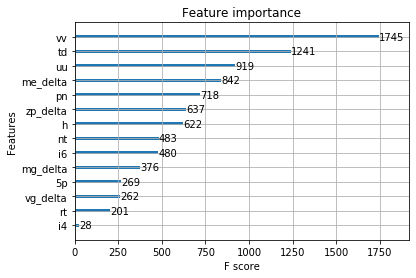

In [20]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xg_reg)
pyplot.show(50,40)

[04:47:09] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


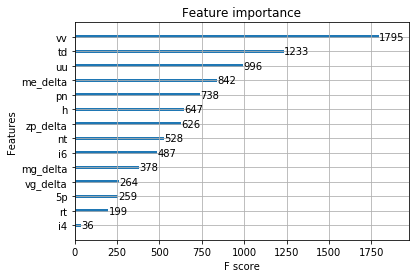

In [21]:
#Code for demographic dataset II(Predicting Debt Payment in 10 Years)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
y = ssdf['tt']
X = ssdf.drop(columns=['tt'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg_db = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.5,
                max_depth = 10, alpha = 10, n_estimators = 15)
xg_reg_db.fit(X_train,y_train)

preds = xg_reg_db.predict(X_test)
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xg_reg_db)
pyplot.show(50,40)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [31]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.35687567652141927
Mean Squared Error: 0.3186079601156035
Root Mean Squared Error: 0.564453682878944


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (array([-0.5549138 , -0.5549138 , -0.5549138 , ..., -0.23551111,
       -0.23551111, -0.22794093], dtype=float32),)

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (a

LDA: nan (nan)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/

KNN: nan (nan)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/

CART: nan (nan)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (array([-4.053821 , -4.0395217, -4.000409 , ...,  4.2847157,  4.306585 ,
        4.3070054], dtype=float32),)

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (array([-4.053821 , -4.0395217, -4.000409 , ...,  4.2847157,  4.306585 ,
        4.3070054], dtype=float32),)

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test par

NB: nan (nan)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/

SVM: nan (nan)


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)


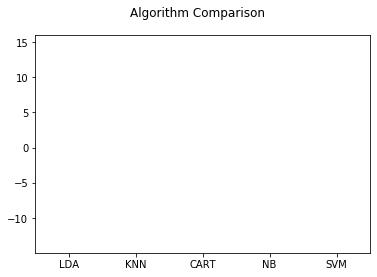

In [25]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
seed = 7
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
pca10 = PCA(n_components=10, svd_solver='full')

In [27]:
stat_scaled = StandardScaler().fit_transform(df)
pca10.fit(stat_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

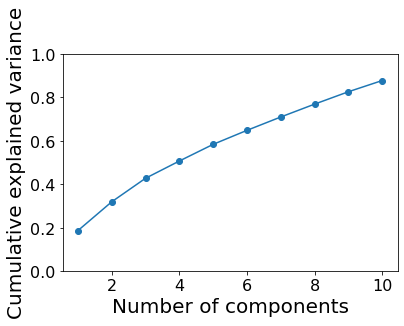

In [28]:
plt.plot(range(1,pca10.n_components+1), np.cumsum(pca10.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

In [29]:

# evaluate adaboost ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
y = ssdf['tt']
X = ssdf.drop(columns=['tt'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# define the model
model = AdaBoostRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -0.495 (0.007)


In [31]:
!pip install tensorflow

     |███████████████████████▌        | 289.1 MB 120.4 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 394.3 MB 16 kB/s 
     |████████████████████████████████| 127 kB 112.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 79.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 389 kB/s  eta 0:00:01
     |████████████████████████████████| 10.6 MB 87.9 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 101.0 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 10.1 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 106.7 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 105.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 68.3 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 70.5 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4830 sha256=d0988b8e4de653d7c88f6711c33589df3fc9543b5bcbd958a1b7e868022cf66c
  Stored in directory: /h

In [35]:
X.shape

(1310720, 14)

In [38]:
df.columns

Index(['mg_delta', 'me_delta', 'zp_delta', 'vg_delta', 'td', 'tt', 'pn', 'nt',
       'h', 'rt', 'i4', '5p', 'i6', 'uu', 'vv'],
      dtype='object')

count    1.310720e+06
mean     4.985594e+00
std      4.642217e+00
min     -1.384076e+01
25%      1.889038e+00
50%      4.760803e+00
75%      8.070129e+00
max      2.498734e+01
Name: tt, dtype: float64


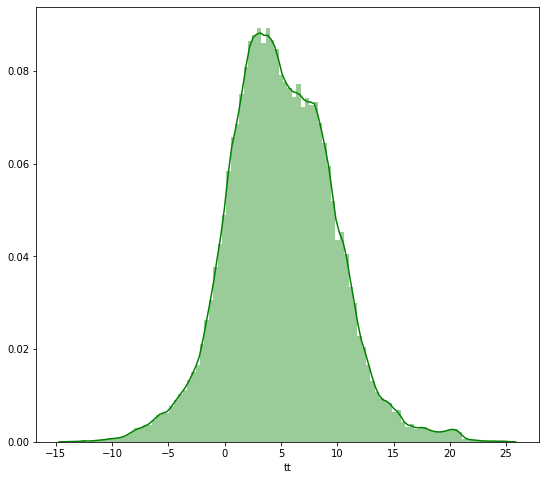

In [37]:
print(df['tt'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['tt'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
'mg_delta', 'me_delta', 'zp_delta', 'vg_delta', 'td', 'tt', 'pn', 'nt',
       'h', 'rt', 'i4', '5p', 'i6', 'uu', 'vv'

count    1.310720e+06
mean    -3.293303e-01
std      1.606373e+02
min     -8.023008e+02
25%     -5.605078e+01
50%      6.054688e-01
75%      4.573828e+01
max      7.544180e+02
Name: me_delta, dtype: float64


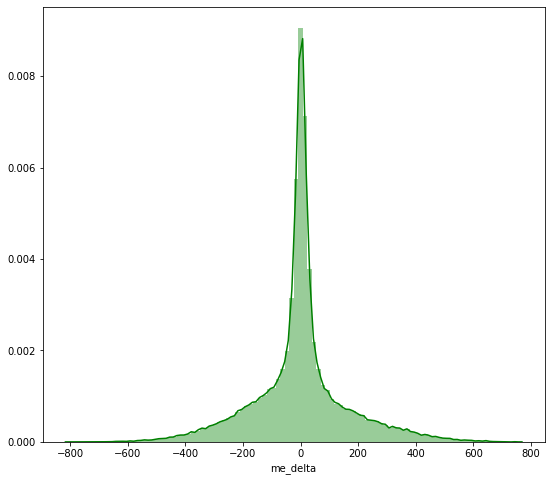

In [40]:
print(df['me_delta'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['me_delta'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1.310720e+06
mean     9.911274e-01
std      1.896571e+00
min     -3.436426e+00
25%     -1.747074e-01
50%      9.703121e-01
75%      2.205969e+00
max      1.036924e+01
Name: zp_delta, dtype: float64


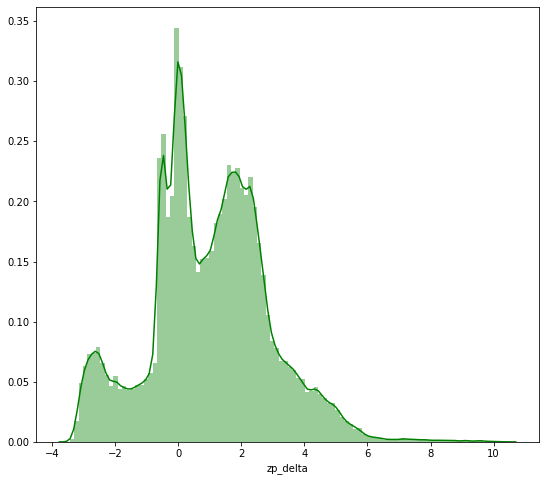

In [41]:
print(df['zp_delta'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['zp_delta'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1.310720e+06
mean     2.213414e+00
std      4.322602e+00
min     -1.653065e+01
25%     -6.446228e-01
50%      2.276978e+00
75%      5.283249e+00
max      1.531520e+01
Name: td, dtype: float64


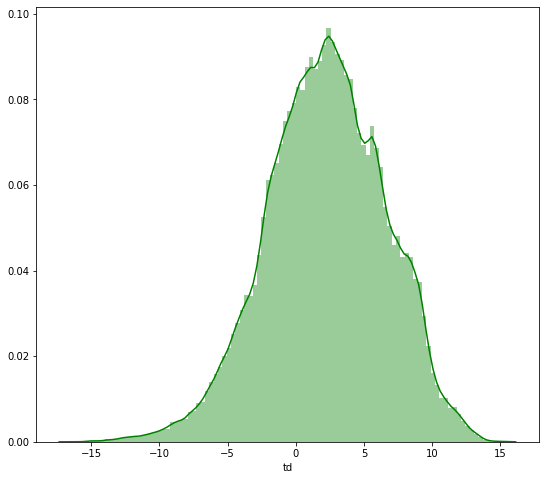

In [42]:
print(df['td'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['td'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1.310720e+06
mean     1.021847e+03
std      7.959141e+00
min      1.005616e+03
25%      1.012298e+03
50%      1.014240e+03
75%      1.016953e+03
max      1.023602e+03
Name: pn, dtype: float64


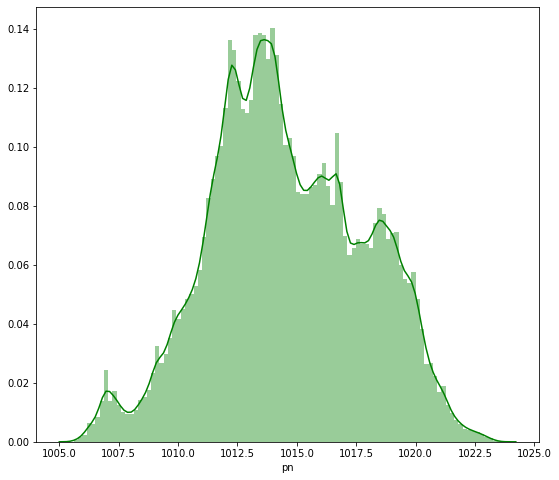

In [43]:
print(df['pn'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['pn'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1.310720e+06
mean     5.036243e-01
std      4.228306e-01
min      0.000000e+00
25%      0.000000e+00
50%      5.346680e-01
75%      9.658203e-01
max      1.000000e+00
Name: nt, dtype: float64


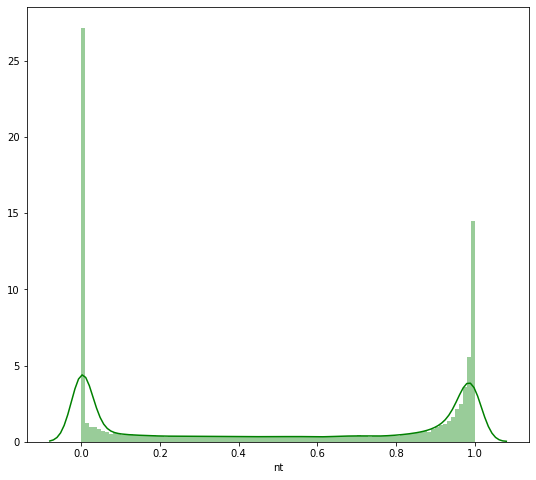

In [44]:
print(df['nt'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['nt'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1.310720e+06
mean     1.012061e+03
std      5.427440e+02
min      5.497559e+01
25%      4.546646e+02
50%      1.276395e+03
75%      1.499817e+03
max      2.250395e+03
Name: h, dtype: float64


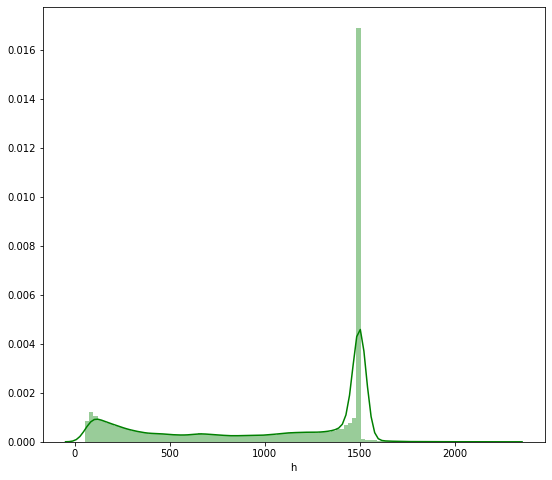

In [45]:
print(df['h'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['h'], color='g', bins=100, hist_kws={'alpha': 0.4});

count    1.310720e+06
mean     6.862428e-08
std      2.120975e-07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.235174e-08
max      4.939735e-06
Name: rt, dtype: float64


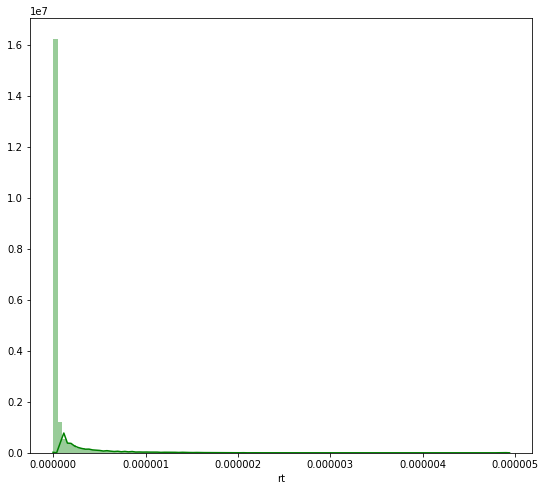

In [46]:
print(df['rt'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['rt'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [48]:
list(set(df.dtypes.tolist()))

[dtype('float32')]

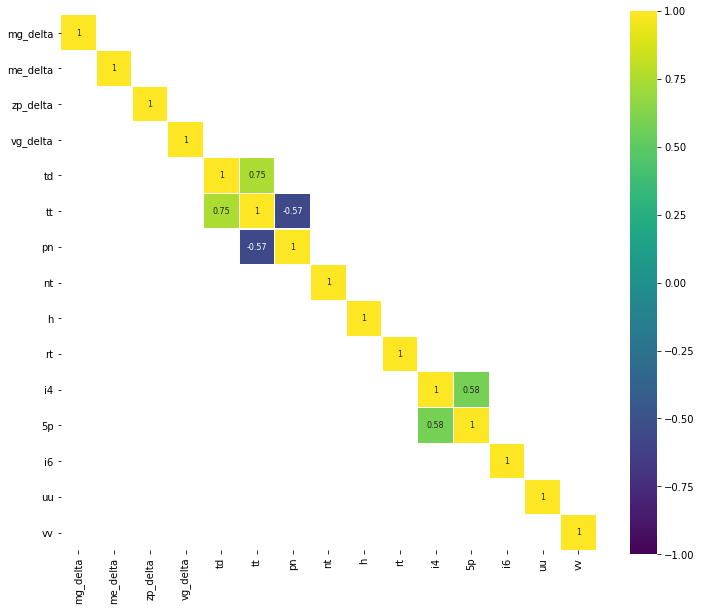

In [51]:
corr = df.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [52]:
# Numpy and xarray are always necessary
import numpy as np
import xarray as xr

# pyplot needed to plot the dataset, but animation only needed much further down.
from matplotlib import pyplot as plt, animation
%matplotlib inline

# This is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display

In [ ]:
from keras import models, layers

model = Sequential()
model.add(Dense(100, input_dim=15, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(75, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, kernel_initializer='uniform', activation='tanh'))
# output layer
model.add(layers.Dense(1))

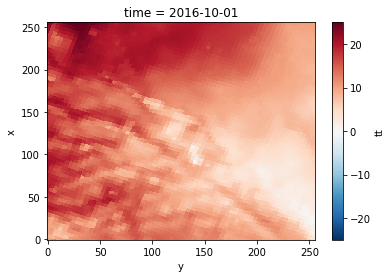

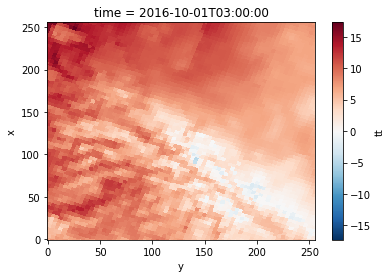

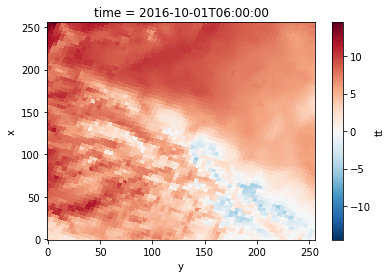

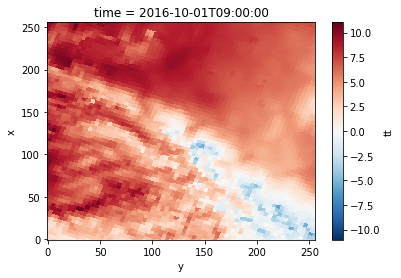

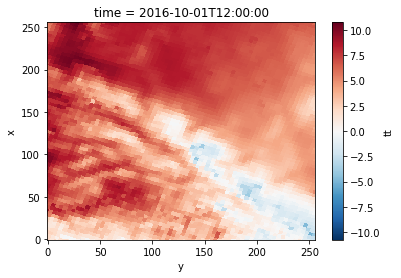

In [33]:
tas=sample_x.tt
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.show()
    plt.close()

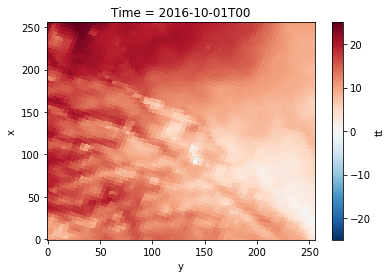

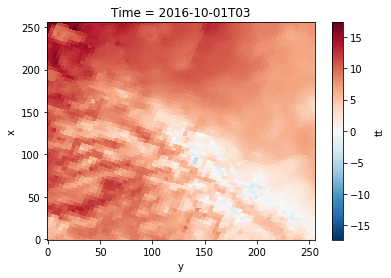

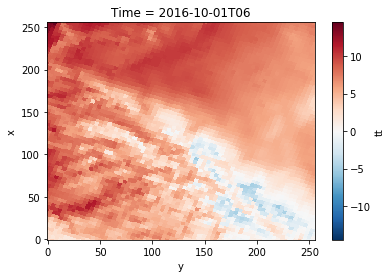

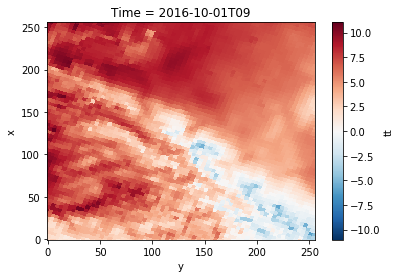

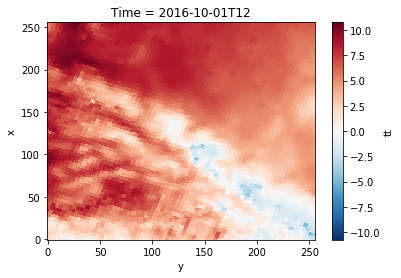

In [34]:
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.show()
    plt.close()

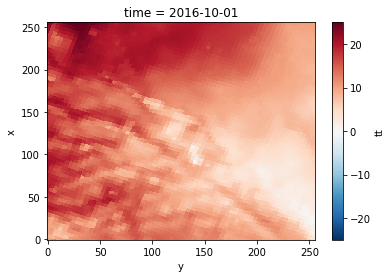

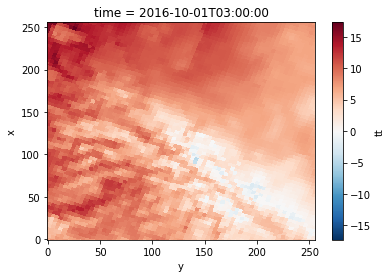

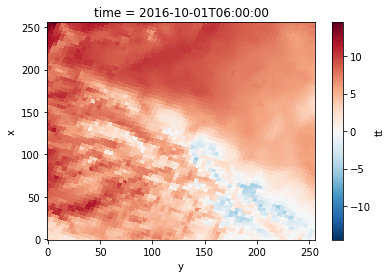

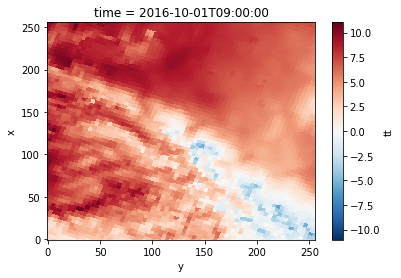

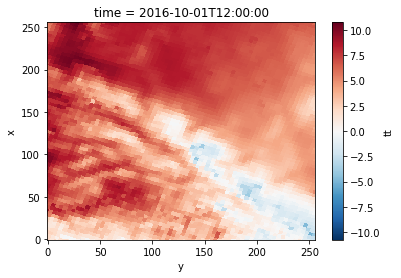

In [35]:
tas=sample_x.tt
for i in range(5):
    tas[i,:,:].plot(figsize=(6,4))
    plt.show()
    plt.close()

In [36]:
for i in range(20):
    tas[i,:,:].plot(
        figsize = (12,6)      # We'll make it a bit bigger
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"Python_Animation_01_frame_{i:04}.png")
    plt.close()

In [37]:
from IPython.display import HTML, display

!convert Python_Animation_01_frame*png Python_Animation_01.gif
display(HTML("<img src='Python_Animation_01.gif' />"))

/bin/sh: convert: command not found


In [38]:
for i in range(20):
    tas[i,:,:].plot(
        figsize = (12,6),
        vmin=-40, vmax=40  # Minimum and Maximum values
    )
    plt.title("Time = " + str(tas.coords['time'].values[i])[:13])
    plt.savefig(f"Python_Animation_02_frame_{i:04}.png")
    plt.close()

In [39]:
!convert Python_Animation_02_frame*.png Python_Animation_02.gif
display(HTML("<img src='Python_Animation_02.gif' />"))

/bin/sh: convert: command not found


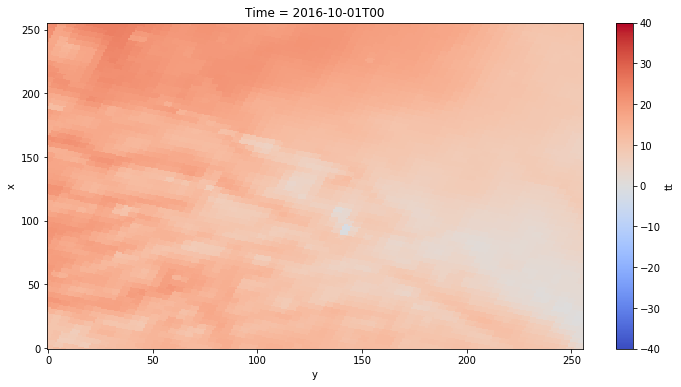

In [40]:
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))
from matplotlib import pyplot as plt, animation

# Plot the initial frame. 
cax = tas[0,:,:].plot(
    add_colorbar=True,
    cmap='coolwarm',
    vmin=-40, vmax=40,
    cbar_kwargs={
        'extend':'neither'
    }
)

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(tas[frame,:,:].values.flatten())
    ax.set_title("Time = " + str(tas.coords['time'].values[frame])[:13])

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=20,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [41]:
HTML(ani.to_jshtml())